In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Reviews = pd.read_csv(r'C:\Users\shra1\Downloads\archive (2)\Restaurant_Reviews.tsv',delimiter = '\t',quoting = 3)

In [6]:
Reviews

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
Reviews['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [11]:
from wordcloud import WordCloud, STOPWORDS

Most Used words

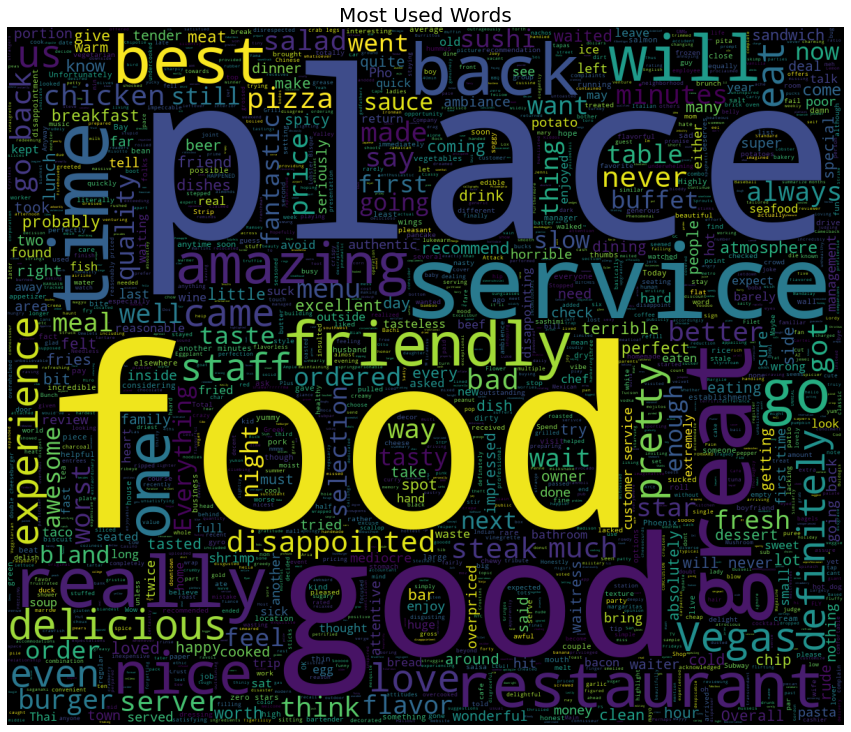

In [13]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(background_color= 'black',max_words=5000,
                     width= 1200,stopwords = STOPWORDS,height=1000
                     ).generate(" ".join(Reviews['Review']))
plt.title("Most Used Words", fontsize = 20)
plt.imshow(wordcloud.recolor(colormap='viridis'))
plt.axis('off')
plt.show()

POSITIVE REVIEWS

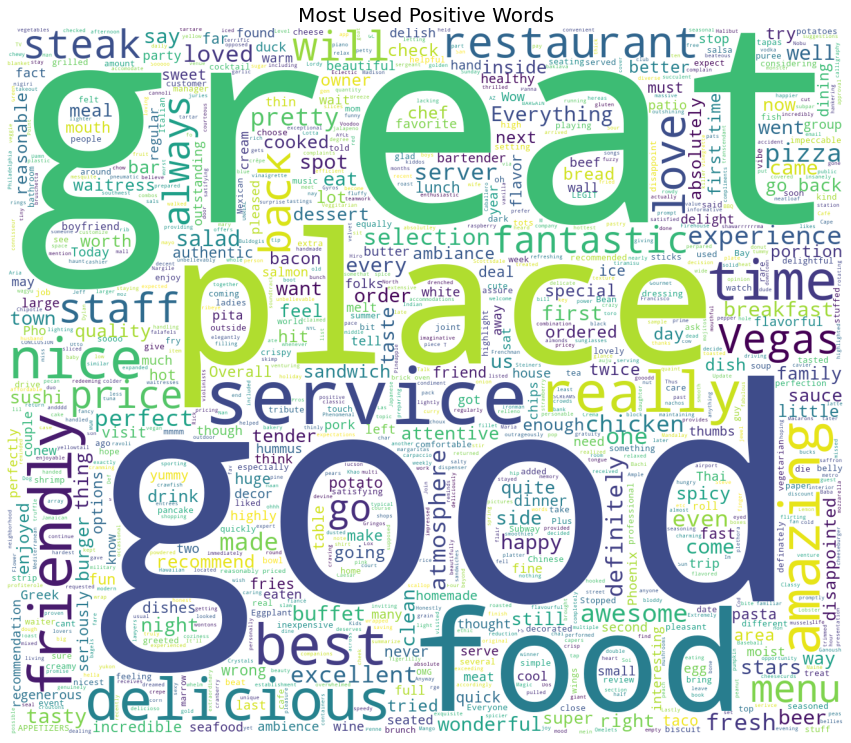

In [15]:
Positive_reviews = Reviews.loc[Reviews['Liked']==1]['Review']
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(background_color='White',max_words = 5000,
                     width = 1300, height = 1100,stopwords = STOPWORDS
                     ).generate(" ".join(Positive_reviews))
plt.title("Most Used Positive Words",fontsize = 20)
plt.imshow(wordcloud.recolor(colormap='viridis'))
plt.axis('off')
plt.show()

NEGATIVE REVIEWS

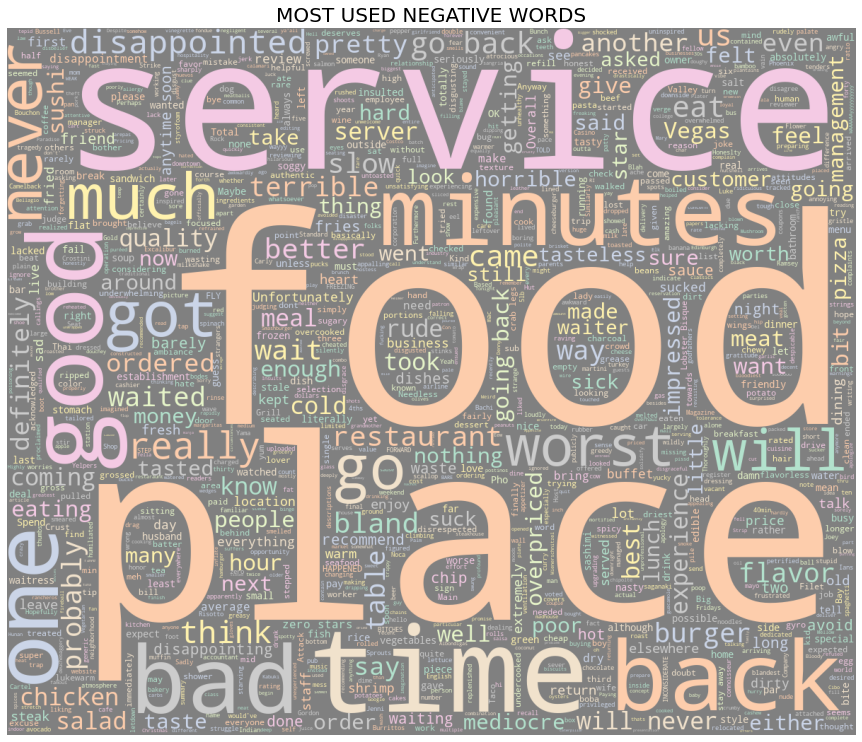

In [19]:
negative_reviews=Reviews.loc[Reviews['Liked']==0]['Review']
plt.subplots(figsize=(16,13))
wordcloud = WordCloud( background_color='grey',max_words=5000,
                            width=1200,stopwords=STOPWORDS,
                            height=1000
                            ).generate(" ".join(negative_reviews)) 
plt.title("MOST USED NEGATIVE WORDS",fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Pastel2'))
plt.axis('off')
plt.show()


Text Cleaning

In [20]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shra1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',Reviews['Review'][i])
    review=review.lower()
    review= review.split()
    ps = PorterStemmer()
    all_stopwords= stopwords.words('english')
    all_stopwords.remove('not')
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
    

In [23]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

Creating Bag of words Model

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1450)
X = cv.fit_transform(corpus).toarray()
Y= Reviews.iloc[:,-1].values

In [25]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,train_size=0.8,test_size=0.2 ,random_state=0)

Model Creation

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(Y_test , y_pred)
print(cm)
print(accuracy_score(Y_test,y_pred))

[[55 42]
 [12 91]]
0.73


Predicting a New Review

In [30]:
#Positive
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]',' ',new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus =[new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


In [31]:
#negative
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


In [32]:
#Ambiguity
new_review = 'I love this restaurant so much and at the same time i hate this'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


TRYING SVM FOR THIS AMBIGUITY REVIEW FOR BETTER ACCURACY

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
print(y_pred)

[0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0]


In [36]:
from sklearn.metrics import confusion_matrix , accuracy_score

cm = confusion_matrix(Y_test , y_pred)
print(cm)
print(accuracy_score(Y_test,y_pred))

[[88  9]
 [36 67]]
0.775


In [37]:
#ambiguity case

new_review = 'I love this restaurant so much and at the same time i hate this'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


Using Lemmatization

In [38]:
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shra1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
corpus2 = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]' , ' ' , Reviews['Review'][i])
    review=review.lower()
    review = review.split() 
    WL = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [WL.lemmatize(word) for word in review if not word in set(all_stopwords)] 
    review = ' '.join(review) 
    corpus2.append(review)

In [41]:
corpus2

['wow loved place',
 'crust not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place not worth time let alone vega',
 'not like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care le interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'a

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bag_of_words = cv.fit_transform(corpus2).toarray()
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

BUILDING MULTIPLE MODELS

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [46]:
y = Reviews.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size = 0.20, random_state = 0)

In [47]:
def clf_model(model):
    clf = model
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test).round())
    recall = recall_score(y_test, clf.predict(X_test).round())
    precision = precision_score(y_test, clf.predict(X_test).round())
    return clf, accuracy, recall, precision

MODEL PERFORMANCES

In [48]:
model_performance = pd.DataFrame(columns = ["Model", "Accuracy", "Recall", "Precision"])

models_to_evaluate = [DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(n_estimators=1000),
                      KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
                      SVC(kernel = 'rbf'), GaussianNB()]
for model in models_to_evaluate:
    clf, accuracy, recall, precision = clf_model(model)
    model_performance = model_performance.append({"Model": model, "Accuracy": accuracy,
                                                  "Recall": recall, "Precision": precision}, ignore_index=True)
model_performance

,Model,Accuracy,Recall,Precision
0,DecisionTreeClassifier(),0.715,0.660194,0.755556
1,LogisticRegression(),0.775,0.708738,0.829545
2,"(DecisionTreeClassifier(max_features='auto', r...",0.755,0.611650,0.875000
3,KNeighborsClassifier(n_neighbors=7),0.635,0.631068,0.650000
4,SVC(),0.770,0.660194,0.860759
5,GaussianNB(),0.690,0.873786,0.647482


We tried different classifiers to see which one performs better. In this case we would keep logistic regression or Supported Vector Classifier.